<a href="https://colab.research.google.com/github/riyansmiha/Age_Pred/blob/main/Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/riyansmiha/Age_Prediction 

Cloning into 'Age_Prediction'...
remote: Enumerating objects: 901, done.
remote: Total 901 (delta 0), reused 0 (delta 0), pack-reused 901
Receiving objects: 100% (901/901), 42.27 MiB | 44.25 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
!pip install ktrain 

     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.1 MB/s 
     |████████████████████████████████| 981 kB 57.8 MB/s 
     |████████████████████████████████| 263 kB 67.4 MB/s 
     |████████████████████████████████| 2.8 MB 56.0 MB/s 
     |████████████████████████████████| 1.2 MB 24.1 MB/s 
     |████████████████████████████████| 468 kB 65.7 MB/s 
     |████████████████████████████████| 596 kB 68.0 MB/s 
     |████████████████████████████████| 880 kB 67.0 MB/s 
     |████████████████████████████████| 3.3 MB 52.3 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.2-py3-none-any.whl size=25313063 sha256=92545ca3b9158ae7db04b1fbc1d8eb1705bc2063f504d1b9c40f1901278bda04
  Stored in directory: /root/.cache/pip/wheels/0a/b3/dd/512a01ea0b4f31d96163518b58361bb72d3bcb916d291052e7
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=1dc529af9

In [ ]:
%matplotlib inline 
import os
import ktrain 
from ktrain import vision as vis 

In [ ]:
import re 
pattern = r'([^/]+)_\d+_\d+_\d+.jpg$' 

p = re.compile(pattern)
r = p.search('10_0_0_21070110220546177.jpg')
print(r.group(1))

10


In [ ]:
DATADIR = '/content/Age_Prediction'  


In [ ]:
(train_data, test_data, preproc) = vis.images_from_fname(DATADIR, pattern = pattern,
                      is_regression = True,
                      random_state = 42) 

['label']
     label
265   21.0
54    25.0
732    1.0
621   26.0
97    29.0
['label']
     label
595   22.0
587   22.0
543   20.0
645   26.0
487   25.0
Found 702 validated image filenames.
Found 79 validated image filenames.


/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:812: UserWarning: Could not extract target for /content/Age_Prediction/30_0_0_20170117130654291 - Copy - Copy.jpg -  skipping this file
  "Could not extract target for %s -  skipping this file" % (fname)
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:812: UserWarning: Could not extract target for /content/Age_Prediction/28_0_3_20170119194926283 - Copy (2).jpg -  skipping this file
  "Could not extract target for %s -  skipping this file" % (fname)
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:812: UserWarning: Could not extract target for /content/Age_Prediction/28_1_0_20170117180707457 - Copy (2).jpg -  skipping this file
  "Could not extract target for %s -  skipping this file" % (fname)
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:812: UserWarning: Could not extract target for /content/Age_Prediction/28_1_0_20170117193022560 - Copy.jpg -  skipping this file
  "Could not extract 

In [ ]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [ ]:
model = vis.image_regression_model('pretrained_resnet50', train_data = train_data, val_data = test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94781440/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [ ]:
learner = ktrain.get_learner(model= model, train_data=train_data, val_data=test_data, batch_size= 32)

In [ ]:
#learning rate = 1e-4 

In [ ]:
learner.fit_onecycle(1e-4, 5) 



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
22/22 [==============================] - 26s 561ms/step - loss: 576.7585 - mae: 17.1993 - val_loss: 163.2007 - val_mae: 8.5922
Epoch 2/5
22/22 [==============================] - 10s 464ms/step - loss: 307.6333 - mae: 9.5723 - val_loss: 134.5954 - val_mae: 7.2862
Epoch 3/5
22/22 [==============================] - 10s 462ms/step - loss: 237.6967 - mae: 8.0451 - val_loss: 114.4054 - val_mae: 6.9049
Epoch 4/5
22/22 [==============================] - 10s 464ms/step - loss: 192.5472 - mae: 7.4752 - val_loss: 111.2913 - val_mae: 6.9925
Epoch 5/5
22/22 [==============================] - 10s 464ms/step - loss: 178.2701 - mae: 6.9359 - val_loss: 107.2530 - val_mae: 6.9125


In [ ]:
learner.freeze(15)

learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
22/22 [==============================] - 20s 618ms/step - loss: 182.1756 - mae: 7.6755 - val_loss: 165.5407 - val_mae: 10.0072
Epoch 2/5
22/22 [==============================] - 12s 540ms/step - loss: 32.6083 - mae: 4.1534 - val_loss: 120.9549 - val_mae: 7.8031
Epoch 3/5
22/22 [==============================] - 12s 535ms/step - loss: 100.4266 - mae: 5.1479 - val_loss: 67.2654 - val_mae: 5.6205
Epoch 4/5
22/22 [==============================] - 12s 528ms/step - loss: 90.1956 - mae: 4.9524 - val_loss: 87.4851 - val_mae: 7.2398
Epoch 5/5
22/22 [==============================] - 12s 530ms/step - loss: 57.4278 - mae: 4.2547 - val_loss: 76.0604 - val_mae: 6.7339


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
test_data.filenames[1:20]

['22_1_2_20170104021303821.jpg',
 '20_1_4_20170103223117967.jpg',
 '26_1_0_20170105183935352.jpg',
 '25_0_4_20170117195058860.jpg',
 '15_1_4_20170103233356803.jpg',
 '29_1_0_20170104021946334.jpg',
 '13_1_2_20170104013444322.jpg',
 '16_0_0_20170110232528586.jpg',
 '27_1_0_20170117144846034.jpg',
 '27_0_0_20170103182122389.jpg',
 '19_0_2_20170105183427303.jpg',
 '1_0_2_20161219140658208.jpg',
 '26_1_0_20170112203844509.jpg',
 '28_1_1_20170112213654111.jpg',
 '10_1_0_20170109204859493.jpg',
 '21_0_0_20170103234805676.jpg',
 '20_1_4_20170117193602482.jpg',
 '14_0_4_20170103200837103.jpg',
 '24_1_0_20170116222429652.jpg']

In [ ]:
def show_prediction(fname):
  fname = DATADIR + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual = int(p.search(fname).group(1))
  vis.show_image(fname)
  print("Predicted Age: %s | Actual Age: %s" % (pred, actual))

Predicted Age: 13 | Actual Age: 16


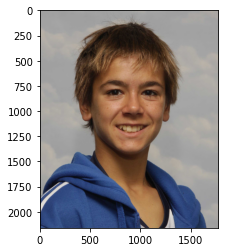

In [ ]:
show_prediction('16_0_0_20170110225708208.jpg')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


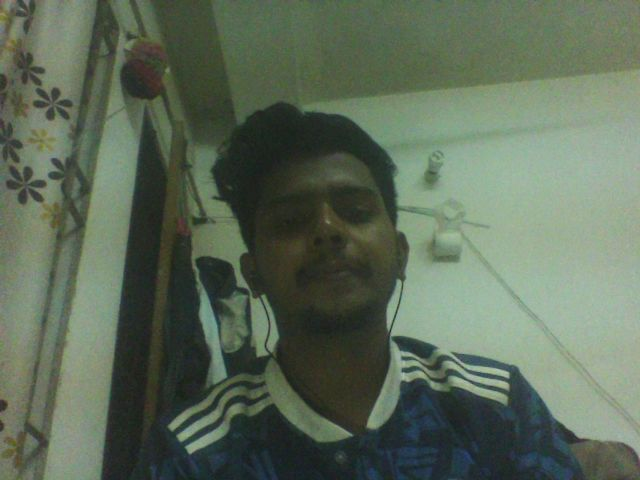

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
def real_prediction(fname):
  pred = round(predictor.predict_filename(fname)[0])
  vis.show_image(fname)
  print("Predicted Age: %s" % pred) 

Predicted Age: 25


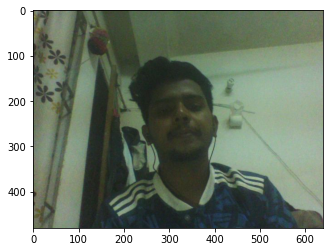

In [ ]:
real_prediction('photo.jpg')

Predicted Age: 14 | Actual Age: 16


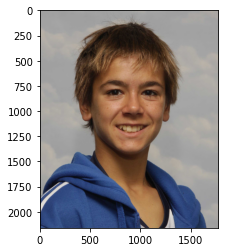

In [ ]:
show_prediction('16_0_0_20170110225708208.jpg')

Predicted Age: 17 | Actual Age: 26


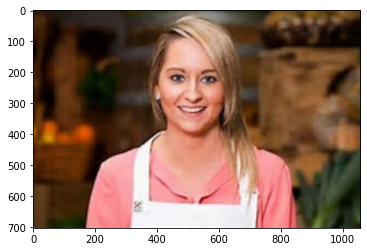

In [ ]:
show_prediction('26_0_0_20170117152804731.jpg')

Predicted Age: 14 | Actual Age: 14


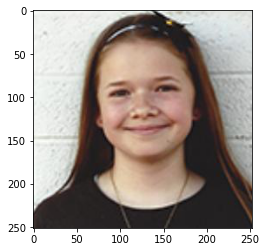

In [ ]:
show_prediction('14_1_0_20170104011720664.jpg')

Predicted Age: 11 | Actual Age: 11


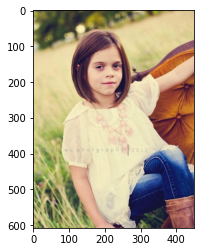

In [ ]:
show_prediction('11_1_0_20170109204523092.jpg')

Predicted Age: 2 | Actual Age: 1


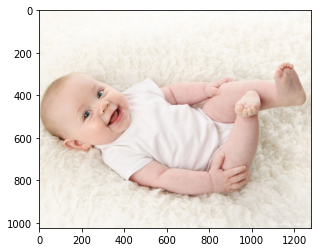

In [ ]:
show_prediction('1_0_0_20170109193328570.jpg')